In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [41]:
kernel = lambda x,z, gamma: np.exp(-gamma*np.square(x-z))

y_train = np.loadtxt("y_train1-1.csv", delimiter=',')
y_test = np.loadtxt("y_test1-1.csv", delimiter=',')
X_train = np.loadtxt("X_train_binary.csv", delimiter=',')
X_test = np.loadtxt("X_test_binary.csv", delimiter=',')
                  
freq = lambda dat: np.unique(dat,return_counts = True)[1]/len(dat)*100

print("Train:", freq(y_train))
print("Test:",freq(y_test))

Train: [45.33333333 54.66666667]
Test: [46.95121951 53.04878049]


In [42]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)

In [58]:
# np.mean(X_train,axis=0)

In [149]:
# for p in np.mean(X_test,axis = 0):
#     print(p,"\\\\")

In [60]:
# scale.mean_

In [61]:
# scale.scale_

In [62]:
X_test_scaled = scale.transform(X_test)

In [154]:
 for p in np.mean(X_test_scaled,axis = 0):
    print(p**2)#,"\\\\")

0.00818103484013775
0.027485045179543525
0.003988238064868953
0.006434737998624761
0.0014331475429971785
0.011757019982914422
0.01095995713647802
0.044753660055481835
0.07227552586568121
0.006473789523390826
0.00019994473915672088
0.0033065601728591
0.00019289492299259678
1.2075329503805255e-05
0.017568553131504714
0.000548933070479963
0.01695166105250329
0.017050810289467314
0.0006359665755679548
0.010122219864806034
0.22622016205279885
0.011677425152956493
0.002326953014423597
0.01359784463968003
0.012231603531367492
0.00030602906824184315
0.010341930129403867
0.016052861217867573
0.03340165140176351
4.8844202140411745e-05
0.001117666952099609
2.465253903715869e-05
0.040066743829121884
9.168907738034425e-05
0.0060395068919048694
0.02958205416278769
0.09059450293714984
0.03147033386953783
0.0022556494313266963
0.0005526613202017679
0.006693210209047084
0.04898208716296525
0.0016395221658653265
0.013493361347442437
0.0008883198142365452
0.010883533100989625
0.0132427004412103
0.0092208

In [242]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Cs = np.logspace(-2,1,40)
Gs = np.logspace(-3,0,40)


Sigs = gamma_to_sig(Gs)

model = SVC()

grid = {'gamma': Gs,'C': Cs}
gridsearch = GridSearchCV(model, grid, cv = 5)
gridsearch.fit(X_train_scaled,y_train)
# for y, G in enumerate(Sigs):
#     for x,C in enumerate(Cs):
#         model = SVC(C = C, kernel = "rbf", gamma = G)
#         score = cross_val_score(model, X_train_scaled, y_train, cv=5)
#         scores[x,y] = score.mean()



# top = np.unravel_index(np.argmax(scores, axis=None), scores.shape)

# model = SVC(C = Cs[top[0]], kernel = "rbf", gamma = Sigs[top[1]])
# model.fit(X_train_scaled,y_train)

# print("Best C:",Cs[top[0]], " Best gamma:", Gs[top[1]])



GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([ 0.01      ,  0.01193777,  0.01425103,  0.01701254,  0.02030918,
        0.02424462,  0.02894266,  0.03455107,  0.04124626,  0.04923883,
        0.05878016,  0.07017038,  0.08376776,  0.1       ,  0.11937766,
        0.14251027,  0.17012543,  0.20309176,  0.2424462 ,  0.28942661,
        0.34551073,  0.41246264,  0.49238826,  0.58780161,  0.70170383,
        0.83767764,  1.        ,  1.19377664,  1.42510...
       0.00242446, 0.00289427, 0.00345511, 0.00412463, 0.00492388,
       0.00587802, 0.00701704, 0.00837678, 0.01      , 0.01193777,
       0.01425103, 0.01701254, 0.02030918, 0.02424462, 0.02894266,
       0.03455107, 0.04124626, 0.04923883, 0.05878016, 0.07017038,
       0.08376776, 0.1       , 0.11937766, 0.14251027, 0.17012543,
       0.20309176, 0.2424462 , 0.28942661, 0.34551073, 0.41246264,
       0.49238826, 0.58780161, 0.70170383, 0.83767764, 1.        ])})

In [243]:
gridsearch.score(X_train_scaled,y_train)
print(gridsearch.best_params_)

{'C': 1.1937766417144369, 'gamma': 0.0345510729459222}


Text(0, 0.5, 'Sigma')

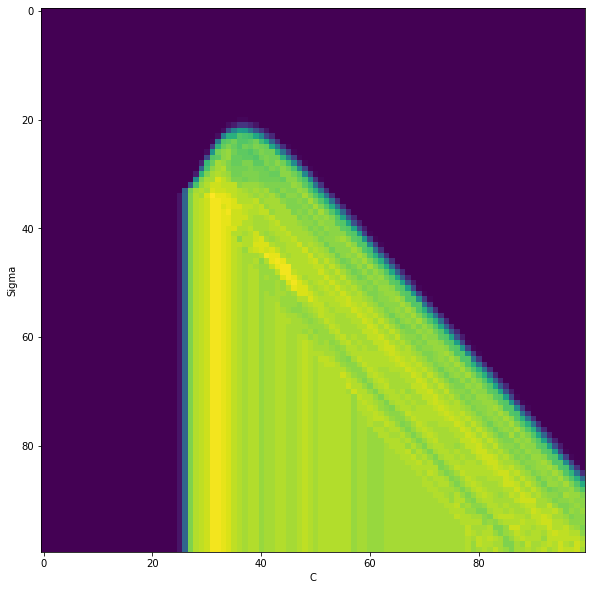

In [176]:
fig, axs = plt.subplots(1,1,figsize =(10,10))
axs.imshow(scores)
axs.set_xlabel("C")
axs.set_ylabel("Sigma")

In [244]:
print("train",sum(gridsearch.predict(X_train_scaled) == y_train)/len(y_train))
print("test",sum(gridsearch.predict(X_test_scaled) == y_test)/len(y_test))


train 1.0
test 0.774390243902439


Text(0.5, 0, 'C')

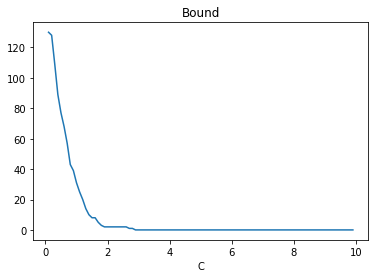

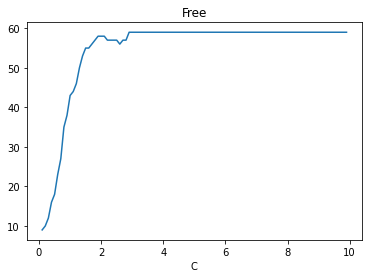

In [293]:

svs = []
coeffs = []
cs = []
for c in range(1,100):
    model = SVC(C = c/10, kernel = "rbf", gamma = 0.03)
    model.fit(X_train_scaled,y_train)
    svs.append(model.support_vectors_)
    coeffs.append(model.dual_coef_)
    cs.append(c/10)
    

bounds = []
free = []
for c,C in zip(coeffs,cs):
    free.append(sum(np.logical_and((np.array(c)<C)[0], (np.array(c)>0)[0])))
    bounds.append(sum((np.abs(c)==C)[0]))
    
    
plt.plot(cs,bounds)
plt.title("Bound")
plt.xlabel("C")

plt.figure()
plt.title("Free")
plt.plot(cs,free)
plt.xlabel("C")